In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"netflix_titles.csv", encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [3]:
# plot number of TV shows vs Movies by type as a pie chart

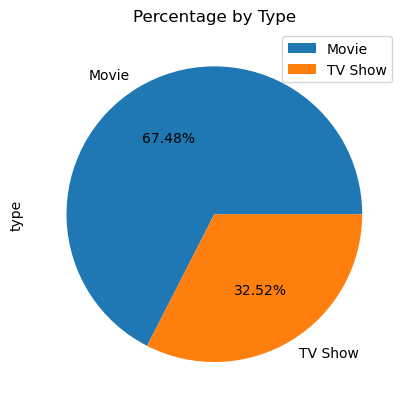

In [4]:
show_type = df.groupby("type")[["type"]].count()
show_type.plot.pie(subplots=True, autopct = "%.2f%%")
plt.title("Percentage by Type")
plt.show()

In [5]:
# how many shows are documentaries

In [6]:
conidition_doc = df["listed_in"].str.contains("Documentaries", case=False)
df[conidition_doc].count().iloc[0]

658

In [7]:
# fill missing values in 'rating' with "MA"

In [8]:
df["rating"] = df["rating"].fillna("MA")

In [9]:
# how many movies are made for Kids

In [10]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [11]:
df["rating_new"] = df["rating"].replace(ratings_ages)

In [12]:
cond_rate = df["rating_new"].str.contains("Kids")
cond_type = df["type"] == "Movie"
kids_movies = df[cond_rate & cond_type]
kids_movies.count().iloc[0]

813

In [13]:
# what is the earliest TV Show that was added to Netflix

In [14]:
# df.dropna(subset=["date_added"], inplace=True)

In [21]:
df.isna().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating             0
duration           0
listed_in          0
description        0
type               0
rating_new         0
dtype: int64

In [23]:
df["date_added"] = pd.to_datetime(df["date_added"], format="%Y-%m-%d")

tv = df[df["type"] == "TV Show"]
earliest_tv = tv[tv["date_added"] == tv["date_added"].min()]
earliest_tv["title"].squeeze()

'Dinner for Five'

In [ ]:
# plot number of movies by release_year as bar chart or any other chart

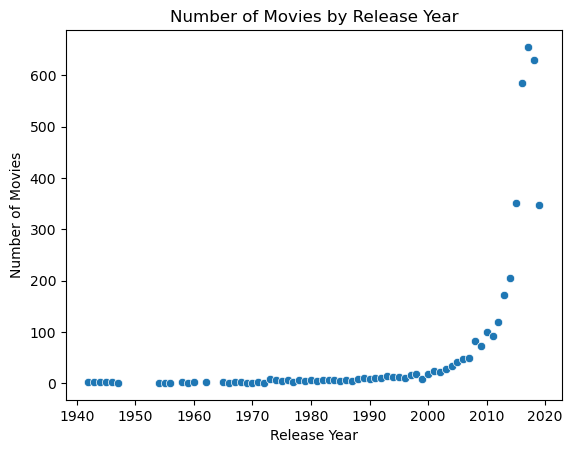

In [53]:
mv = df[df["type"] == "Movie"]
mv_by_year = mv["release_year"].value_counts().sort_index()

sns.scatterplot(x=mv_by_year.index, y=mv_by_year.values)
plt.title("Number of Movies by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
# get top 10 United States Directors by number of movies

In [65]:
condition_mv = df["type"] == "Movie"
condition_us = df["country"].str.contains("United States")

us_mv = df[condition_mv & condition_us]
us_mv["director"].value_counts().head(10)

director
Jay Karas           13
Jay Chapman         12
Marcus Raboy        12
Steven Spielberg     8
Martin Scorsese      8
Shannon Hartman      7
Ryan Polito          7
Lance Bangs          6
Vlad Yudin           6
Troy Miller          5
Name: count, dtype: int64

In [67]:
# explore

In [69]:
df["country"] = df["country"].str.split(",")
df_new = df.explode("country")
df_new.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,rating_new
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,Teens
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Kids
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Teens
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",France,2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Teens
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",Senegal,2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Teens
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...",Belgium,2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Teens
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...",Canada,NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...",United Kingdom,NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,Kids
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Teens
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Adults
